In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Synthetic dataset: height, weight, BMI class (underweight, normal)
data = [
    [150, 45, 'underweight'],
    [160, 60, 'normal'],
    [170, 70, 'normal'],
    [155, 50, 'underweight'],
    [180, 80, 'normal'],
    [165, 55, 'normal'],
    [175, 65, 'normal'],
    [140, 40, 'underweight'],
    [190, 85, 'normal'],
]

# Split dataset into features (X) and labels (y)
X = [[row[0], row[1]] for row in data]
y = [row[2] for row in data]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create K-NN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")

# Example prediction
example_height = 170
example_weight = 75
example_data = [[example_height, example_weight]]
predicted_class = knn_classifier.predict(example_data)

print(f"Predicted BMI class for height {example_height} and weight {example_weight}: {predicted_class[0]}")

Accuracy: 100.00%
Predicted BMI class for height 170 and weight 75: normal


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = pd.read_csv("D:/python_programs/programs/Exam_Programs/Mall_Customers.csv")

In [23]:
# Select relevant features (e.g., annual income and spending score)
X = data.iloc[:, [3, 4]].values

# Standardize the data (important for K-means)
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [26]:
# Use the Elbow Method to find the optimal number of clusters (K)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [9]:
#  Train the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

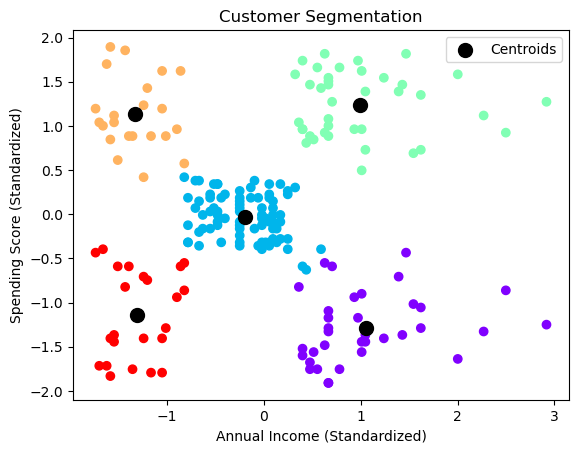

In [10]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend()
plt.show()